In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# A1. Загрузка
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [103]:
# A2. Первые / последние строки
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [104]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [105]:
# A3. Размер и структура
print(df.shape)
df.info()

(374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [106]:
# A4. Проверка типов
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [107]:
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level',
            'Heart Rate', 'Daily Steps']
cat_cols = ['Gender', 'Occupation', 'BMI Category',
            'Blood Pressure', 'Sleep Disorder']

In [108]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


часть B

In [109]:
# Поиск пропусков
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [110]:
# Заполнение пропусков: числовые — медиана, категориальные — мода
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

In [111]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


вычисление дубликатов

In [112]:
dup_mask = df.duplicated()
dup_mask.sum()

np.int64(0)

In [113]:
print('До удаления дубликатов:', df.shape)
df = df.drop_duplicates()
print('После удаления дубликатов:', df.shape)

До удаления дубликатов: (374, 13)
После удаления дубликатов: (374, 13)


дубликатов не было

выбросы

In [114]:
num_df = df[num_cols]

z_scores = np.abs(zscore(num_df, nan_policy='omit'))
z_scores = pd.DataFrame(z_scores, columns=num_df.columns, index=num_df.index)

threshold = 3
outliers_mask = (z_scores > threshold).any(axis=1)
print('Число выбросов:', outliers_mask.sum())

df_outliers = df[outliers_mask]
df_outliers.head()

Число выбросов: 9


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea
145,146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea


часть C

In [115]:
# Описательная статистика
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [116]:
# Частоты категориальных признаков
for c in cat_cols:
    print(f'Колонка: {c}')
    print(df[c].value_counts())
    print('-' * 40)

Колонка: Gender
Gender
Male      189
Female    185
Name: count, dtype: int64
----------------------------------------
Колонка: Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
----------------------------------------
Колонка: BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
----------------------------------------
Колонка: Blood Pressure
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
14

In [117]:
# Корреляции числовых признаков
corr_matrix = df[num_cols].corr()
corr_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


часть D

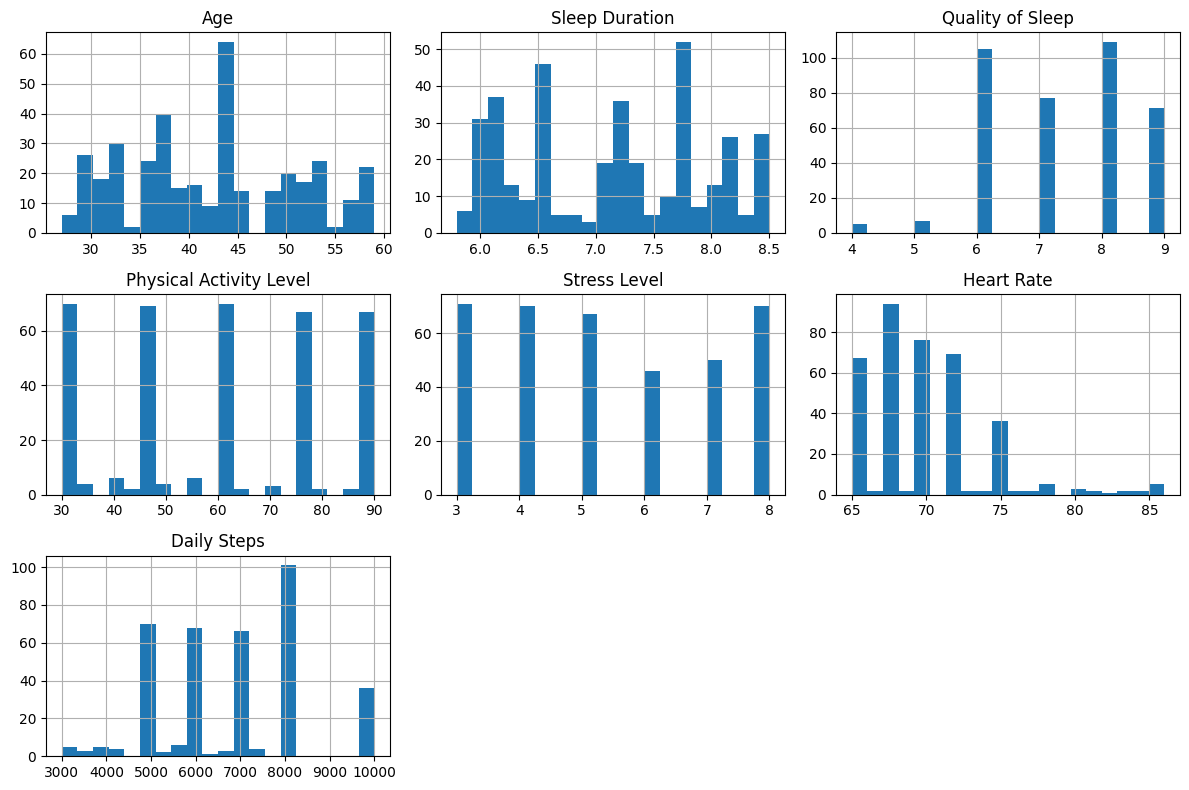

In [118]:
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

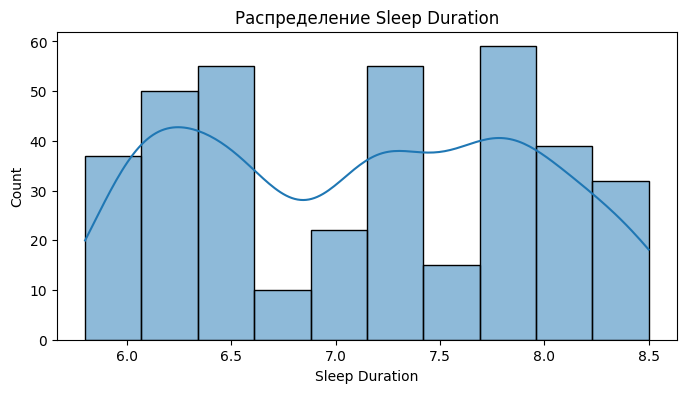

In [119]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Sleep Duration', kde=True)
plt.title('Распределение Sleep Duration')
plt.show()

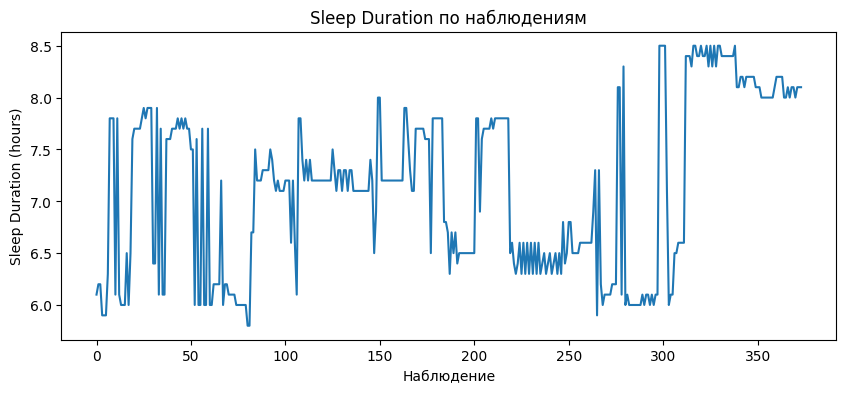

In [120]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Sleep Duration'])
plt.xlabel('Наблюдение')
plt.ylabel('Sleep Duration (hours)')
plt.title('Sleep Duration по наблюдениям')
plt.show()

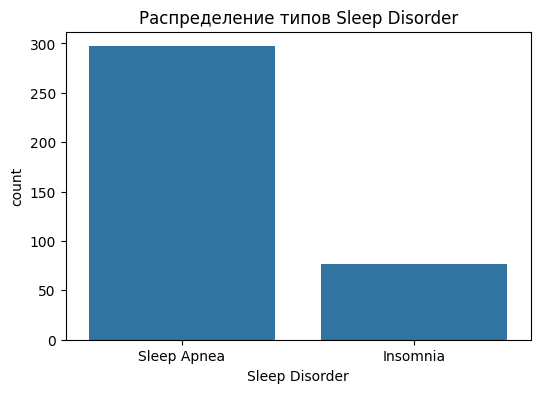

In [121]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sleep Disorder')
plt.title('Распределение типов Sleep Disorder')
plt.show()

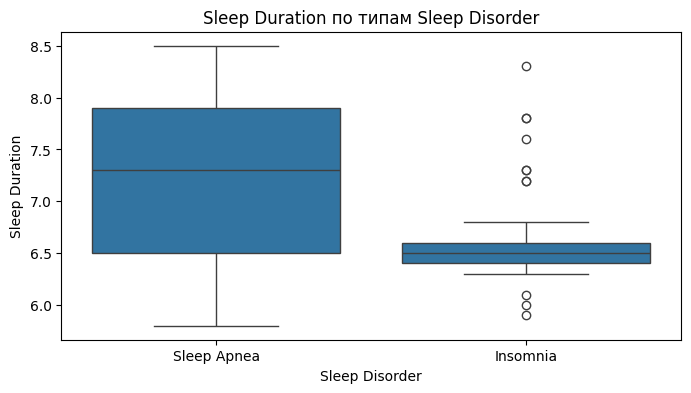

In [122]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Sleep Disorder', y='Sleep Duration')
plt.title('Sleep Duration по типам Sleep Disorder')
plt.show()

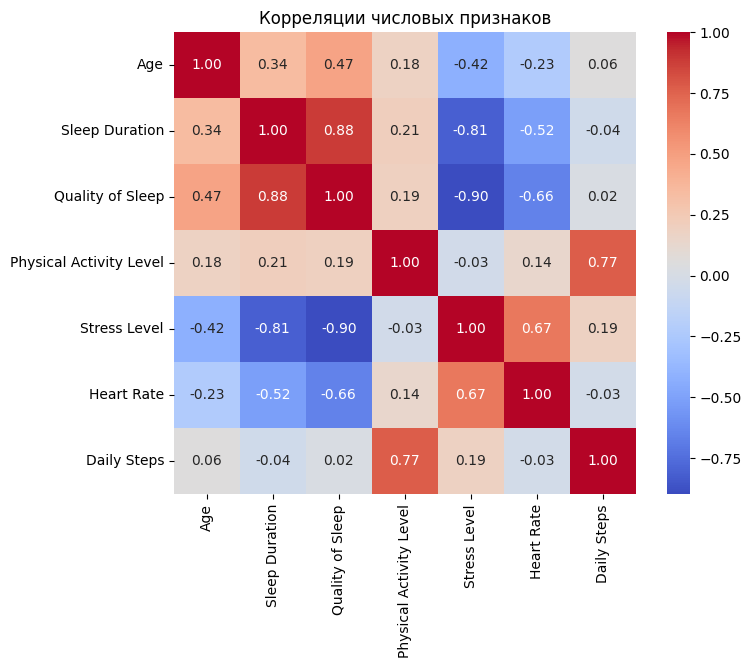

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляции числовых признаков')
plt.show()

часть E

In [124]:
# 1. Среднее и медиана Sleep Duration по Sleep Disorder
group_sleep = df.groupby('Sleep Disorder')['Sleep Duration'].agg(['mean', 'median', 'count'])
group_sleep

,mean,median,count
Sleep Disorder,,,
Insomnia,6.589610,6.5,77
Sleep Apnea,7.272727,7.3,297


In [125]:
# 2. Средний уровень стресса по BMI Category
stress_bmi = df.groupby('BMI Category')['Stress Level'].agg(['mean', 'count'])
stress_bmi

,mean,count
BMI Category,,
Normal,5.128205,195
Normal Weight,5.190476,21
Obese,5.700000,10
Overweight,5.729730,148


In [126]:
# 3. Суммарные шаги по Occupation
steps_occ = df.groupby('Occupation')['Daily Steps'].agg(['sum', 'mean', 'count'])
steps_occ.sort_values('sum', ascending=False).head()

,sum,mean,count
Occupation,,,
Nurse,588200,8057.534247,73
Doctor,483400,6808.450704,71
Engineer,376800,5980.952381,63
Lawyer,360100,7661.702128,47
Accountant,254600,6881.081081,37


In [127]:
# 4. Сводная таблица: средняя Sleep Duration по полу и типу расстройства
pivot_sleep = pd.pivot_table(
    df,
    values='Sleep Duration',
    index='Gender',
    columns='Sleep Disorder',
    aggfunc='mean'
)
pivot_sleep

Sleep Disorder,Insomnia,Sleep Apnea
Gender,,
Female,6.633333,7.373826
Male,6.551220,7.170946


In [128]:
# Сохранение обработанного датасета
df.to_csv('sleep_data_clean.csv', index=False)
print('Датасет сохранен в sleep_data_clean.csv')
print(f'Размер датасета: {df.shape}')

Датасет сохранен в sleep_data_clean.csv
Размер датасета: (374, 13)
